<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/CNN_6%EC%A1%B0_%ED%83%88%EB%AA%A8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install pandas

# 한글 폰트 다운로드 및 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib에 한글 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
# 코랩 셀에 아래 코드 입력
!pip install kaggle --upgrade

In [2]:
from google.colab import files
files.upload()
# 파일 선택 버튼 클릭 후 kaggle.json 파일 업로드

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minjijoo","key":"c68948c91b8a26be79569546b395d84a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls -1ha kaggle.json

kaggle.json


In [5]:
!kaggle competitions download -c 2022-ai-tp-18011886

100% 2.88G/2.88G [00:18<00:00, 231MB/s]
100% 2.88G/2.88G [00:18<00:00, 169MB/s]


In [6]:
# 확인
!ls
# 압축 풀기
!unzip -O cp949 2022-ai-tp-18011886.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_2_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_3_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607245400694_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607245400694_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_3_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_2_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_4_LH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607303586379_4_LH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607303586379_5_RH.jpg  
  inflating:

In [12]:
"train/탈모/5237_A2LEBJJDE00029K_1604044097042_6_BH.jpg"

'train/탈모/5237_A2LEBJJDE00029K_1604044097042_6_BH.jpg'

1. 라이브러리 임포트

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


2. 데이터셋 경로 설정 및 데이터 생성기 정의

In [14]:
train_dir = '/content/train'
test_dir = '/content/test'

# 이미지 데이터 생성기 정의
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  # 검증 세트로 20% 사용

test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # 훈련용 데이터

# 검증 데이터 생성기
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 검증용 데이터

# 테스트 데이터 생성기
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')


Found 9135 images belonging to 4 classes.
Found 2282 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


모델 구성

In [15]:
# 간단한 CNN 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 클래스 수에 맞게 출력 뉴런 수를 4로 설정
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


모델 훈련

In [16]:
# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10
285/285 [==============================] - 126s 438ms/step - loss: 1.2882 - accuracy: 0.3730 - val_loss: 1.2435 - val_accuracy: 0.4335
Epoch 2/10
285/285 [==============================] - 114s 399ms/step - loss: 1.1608 - accuracy: 0.4803 - val_loss: 1.3236 - val_accuracy: 0.3460
Epoch 3/10
285/285 [==============================] - 119s 417ms/step - loss: 1.0850 - accuracy: 0.5173 - val_loss: 1.1752 - val_accuracy: 0.4688
Epoch 4/10
285/285 [==============================] - 115s 402ms/step - loss: 1.0477 - accuracy: 0.5361 - val_loss: 1.1877 - val_accuracy: 0.4485
Epoch 5/10
285/285 [==============================] - 109s 382ms/step - loss: 1.0001 - accuracy: 0.5600 - val_loss: 1.1697 - val_accuracy: 0.4749
Epoch 6/10
285/285 [==============================] - 114s 401ms/step - loss: 0.9663 - accuracy: 0.5828 - val_loss: 1.1371 - val_accuracy: 0.5075
Epoch 7/10
285/285 [==============================] - 106s 373ms/step - loss: 0.9334 - accuracy: 0.5949 - val_loss: 1.1656 -

훈련 검증 및 시각화

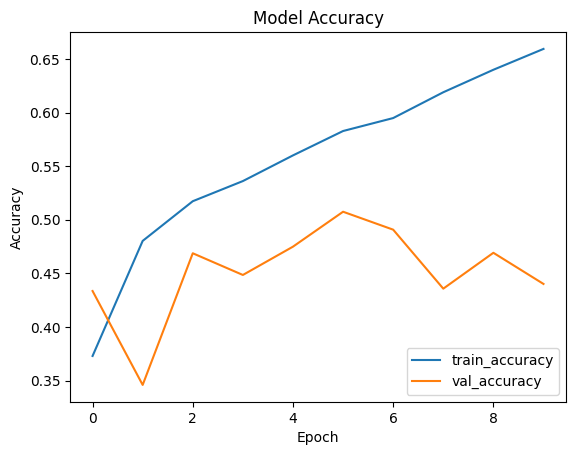

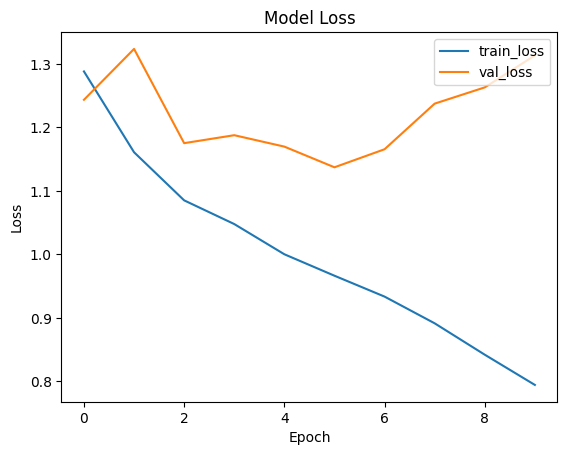

In [17]:
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


모델 평가

In [20]:
import numpy as np

<H1> 정상과 탈모만 이진 분류 - CNN 사용

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 코랩 셀에 아래 코드 입력
!pip install kaggle --upgrade

In [ ]:
from google.colab import files
files.upload()
# 파일 선택 버튼 클릭 후 kaggle.json 파일 업로드

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minjijoo","key":"c68948c91b8a26be79569546b395d84a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!kaggle competitions download -c 2022-ai-tp-18011886

100% 2.88G/2.88G [02:14<00:00, 22.7MB/s]
100% 2.88G/2.88G [02:14<00:00, 23.0MB/s]


In [ ]:
# 확인
!ls
# 압축 풀기
!unzip -O cp949 2022-ai-tp-18011886.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_2_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_3_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607242741157_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607245400694_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607245400694_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_3_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_5_RH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607251300940_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_2_TH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_4_LH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607260775335_6_BH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607303586379_4_LH.jpg  
  inflating: train/정상/1069_A2LEBJJDE00094D_1607303586379_5_RH.jpg  
  inflating:

In [ ]:
train_data_dir = '/content/train' # 데이터 로드

In [ ]:
# 이미지 데이터 생성기 설정
train_datagen = ImageDataGenerator(rescale=1./255,  # 정규화
                                   shear_range=0.2,
                                   zoom_range=0.2,   # 확대/축소
                                   horizontal_flip=True,  # 수평
                                   validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['정상', '탈모'],
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['정상', '탈모'],
    subset='validation')


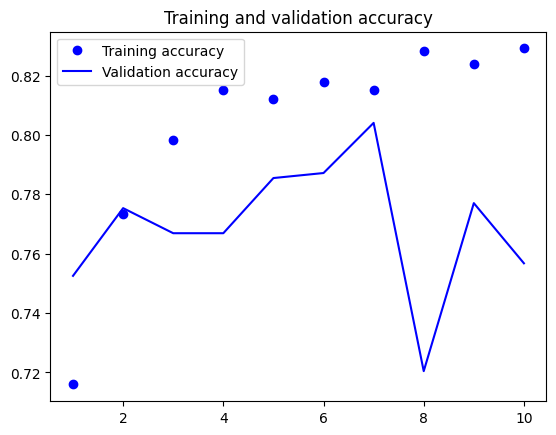

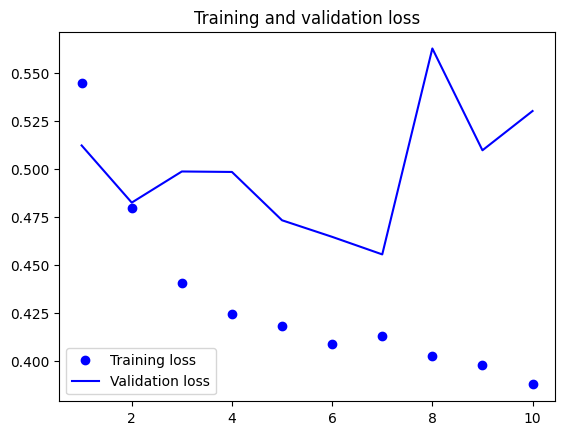

In [ ]:
# 학습 결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

김민채

In [ ]:
import os
import numpy as np
from keras.preprocessing import image

# 경로 설정
train_path = '/content/train'
labels = ['비듬성', '염증성', '정상', '탈모']

# 이미지와 레이블을 저장할 리스트 초기화
images = []
image_labels = []

# 각 클래스 디렉토리 순회
for label in labels:
    class_path = os.path.join(train_path, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        # 이미지 로드 및 변환
        img = image.load_img(img_path, target_size=(224, 224))
        img_tensor = image.img_to_array(img)
        images.append(img_tensor)
        image_labels.append(label)

# 리스트를 넘파이 배열로 변환
images = np.array(images)
image_labels = np.array(image_labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {image_labels.shape}")


Images shape: (11417, 224, 224, 3)
Labels shape: (11417,)


In [ ]:
# 데이터 전처리 - 시각화

normalized_images = images / 255.0

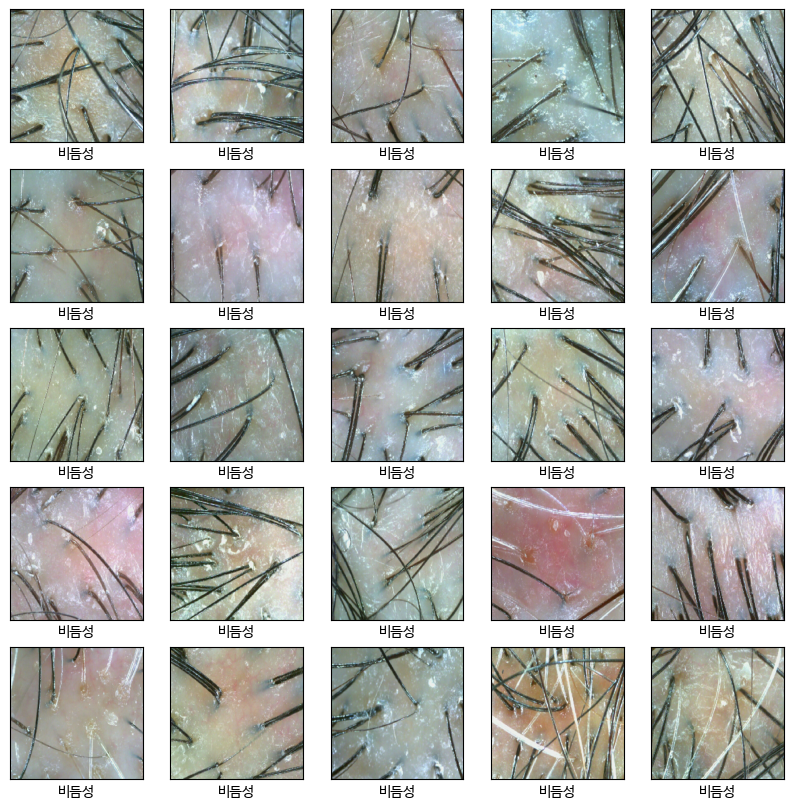

In [ ]:
# 이미지 - 레이블 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(normalized_images[i])
    plt.xlabel(image_labels[i])
plt.show()

In [ ]:
# 데이터 전처리 - labels
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
image_labels = le.fit_transform(image_labels)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


train_images, test_images, train_labels, test_labels = train_test_split(
    images, image_labels, test_size=0.3, random_state=42, shuffle=True
)

# 레이블을 원-핫 인코딩
train_labels = to_categorical(train_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

# 모델 구성
with tf.device('/device:GPU:0'):
  model = keras.Sequential([
      base_model,
      layers.GlobalAveragePooling2D(),
      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(4, activation='softmax')
  ])

  # 모델 컴파일
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()


  # 데이터 증강
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  # 검증 데이터는 단순히 rescale
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # 이미지 데이터 제너레이터
  train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
  validation_generator = validation_datagen.flow(test_images, test_labels, batch_size=32)

  # 콜백 설정
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

  # 모델 학습
  history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
      callbacks=[early_stopping, model_checkpoint]
  )

  # 모델 평가
  loss, accuracy = model.evaluate(validation_generator)
  print(f'Validation Accuracy: {accuracy}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 3573828 (13.63 MB)
Trainable params: 13158

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 92s 342ms/step - loss: 1.2801 - accuracy: 0.4379 - val_loss: 1.1181 - val_accuracy: 0.4988
Epoch 2/20
250/250 [==============================] - 84s 337ms/step - loss: 1.1368 - accuracy: 0.4908 - val_loss: 1.1123 - val_accuracy: 0.5076
Epoch 3/20
250/250 [==============================] - 83s 333ms/step - loss: 1.1193 - accuracy: 0.4996 - val_loss: 1.0870 - val_accuracy: 0.5260
Epoch 4/20
250/250 [==============================] - 84s 337ms/step - loss: 1.1090 - accuracy: 0.5078 - val_loss: 1.1288 - val_accuracy: 0.4866
Epoch 5/20
250/250 [==============================] - 85s 338ms/step - loss: 1.1187 - accuracy: 0.5077 - val_loss: 1.0951 - val_accuracy: 0.5134
Epoch 6/20
250/250 [==============================] - 84s 335ms/step - loss: 1.1050 - accuracy: 0.5021 - val_loss: 1.1076 - val_accuracy: 0.4965
Epoch 7/20
250/250 [==============================] - 84s 335ms/step - loss: 1.0955 - accuracy: 0.5167 - val_loss: 1.1058 - val_accuracy: 0.4

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
  plt.show()

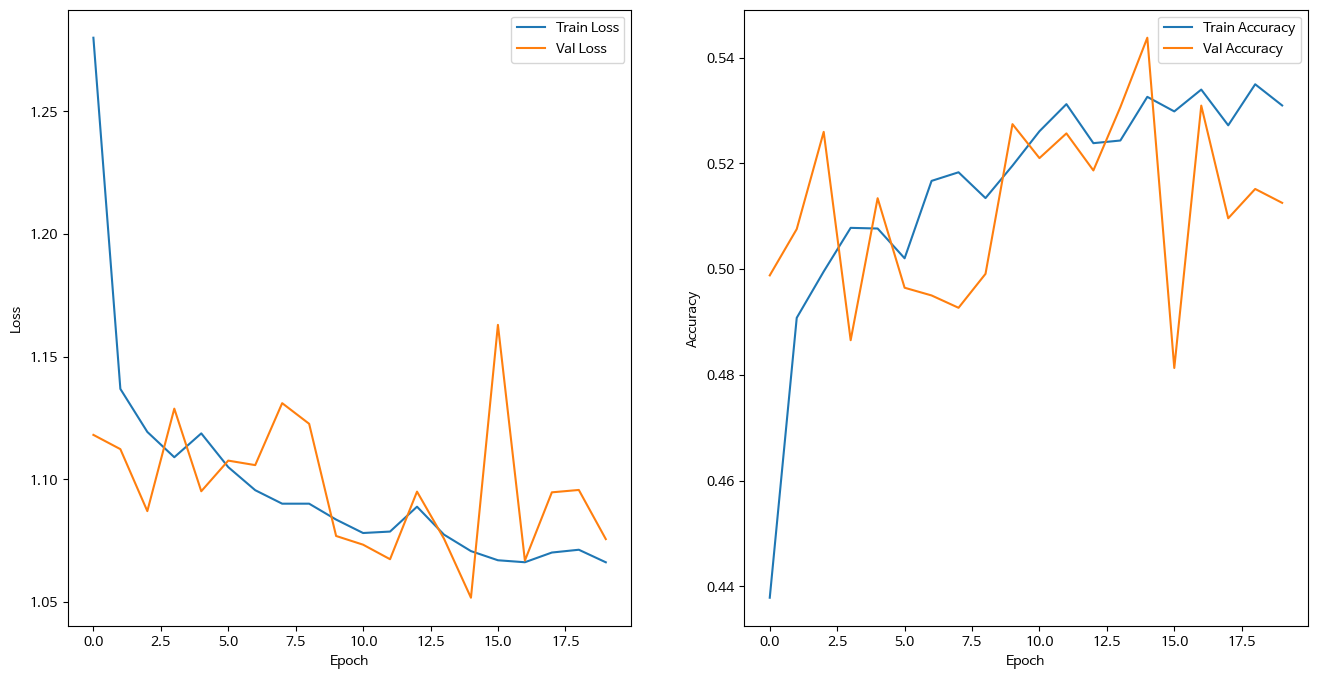

In [ ]:
plot_history(history)

108/108 [==============================] - 4s 24ms/step


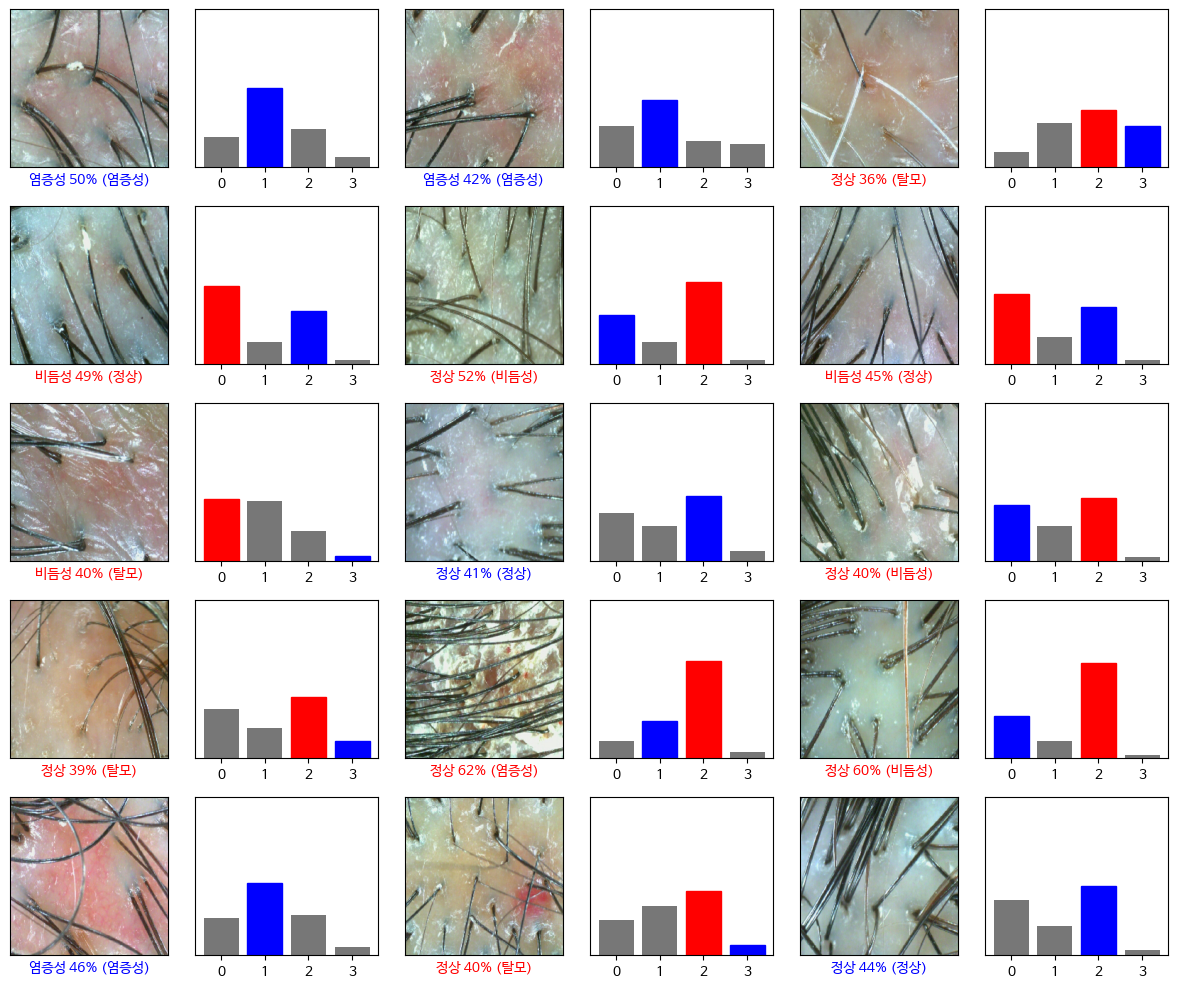

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot_image 함수 정의
def plot_image(i, predictions_array, true_label, img):
    true_label = np.argmax(true_label[i])  # true_label을 인덱스로 변환
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[i].astype("uint8"))  # 이미지 스케일이 적절한지 확인
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        labels[predicted_label],
        100*np.max(predictions_array),
        labels[true_label]),
        color=color
    )

# plot_value_array 함수 정의
def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label[i])  # true_label을 인덱스로 변환
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 예측 생성 (여기서는 모델 예측을 사용해야 함)
predictions = model.predict(test_images)

# 첫 X 테스트 이미지, 예측 레이블, 진짜 레이블을 그리기
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
